# Dragon Real Estate- Price Predictor

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
housing=pd.read_csv(r'C:\Zaid\Data Science\Liner Regression\Projects\UCI_Data.csv')

In [4]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing['CHAS '].value_counts()

CHAS 
0    471
1     35
Name: count, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


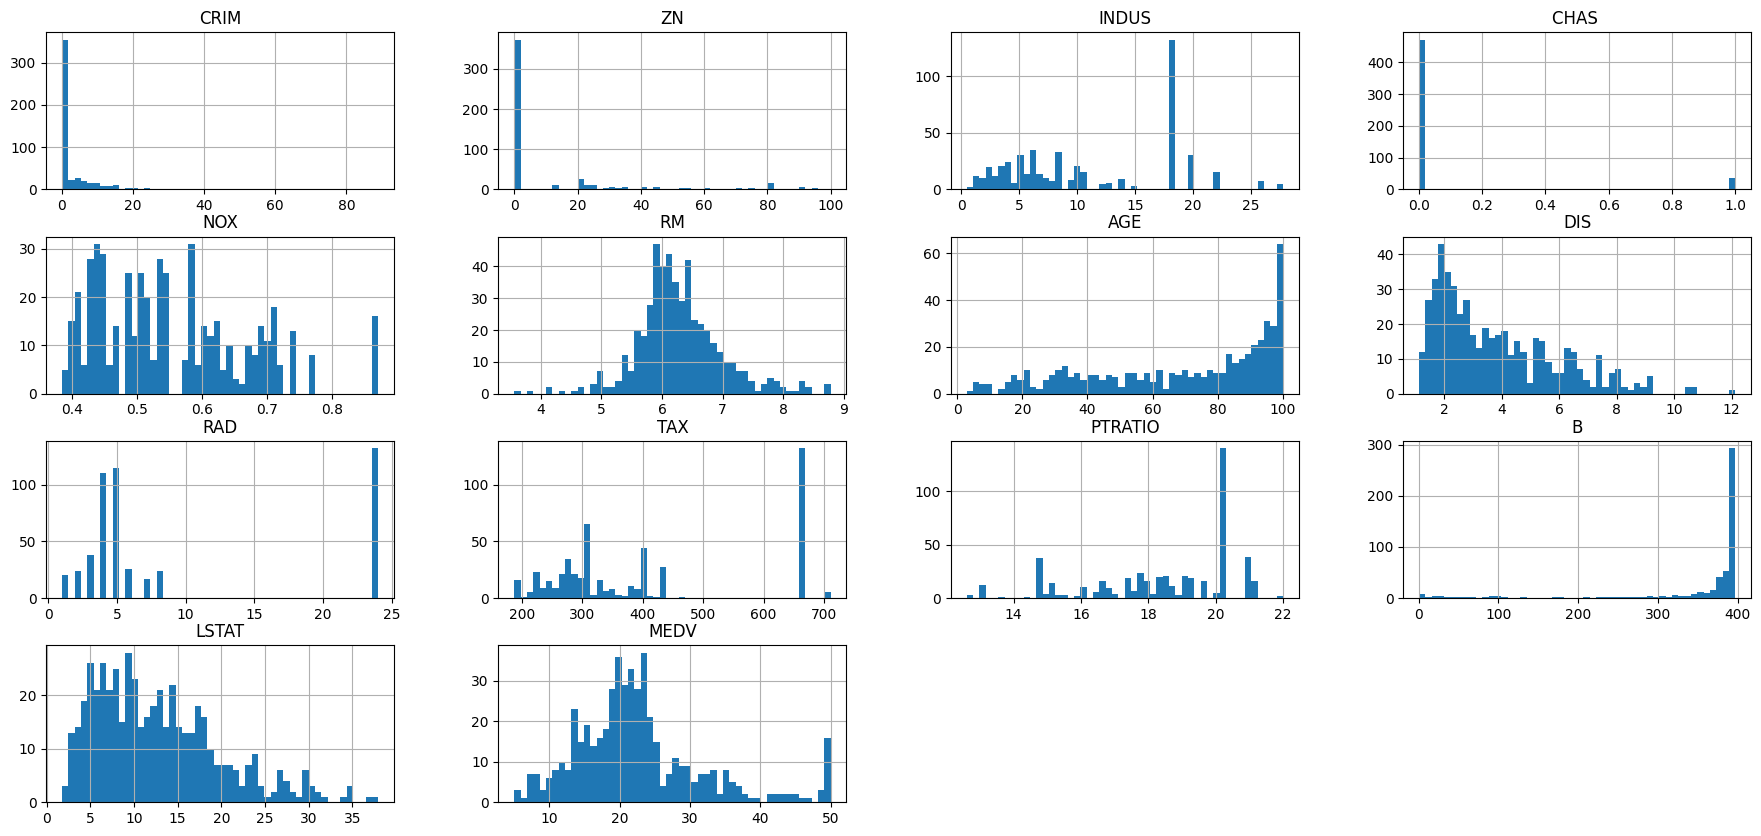

In [8]:
housing.hist(bins=50,figsize=(22,10))
plt.show()

### Looking for Correlations

In [9]:
corr_pearson=housing.corr(method='pearson')
corr_spearman=housing.corr(method='spearman')

In [10]:
corr_comapre=pd.DataFrame({
    'Pearson':corr_pearson['MEDV'],
    'Spearman':corr_spearman['MEDV']
}).sort_values(by='Pearson',ascending=False)

In [11]:
corr_comapre

,Pearson,Spearman
MEDV,1.000000,1.000000
RM,0.695360,0.633576
ZN,0.360445,0.438179
B,0.333461,0.185664
DIS,0.249929,0.445857
CHAS,0.175260,0.140612
AGE,-0.376955,-0.547562
RAD,-0.381626,-0.346776
CRIM,-0.388305,-0.558891
NOX,-0.427321,-0.562609


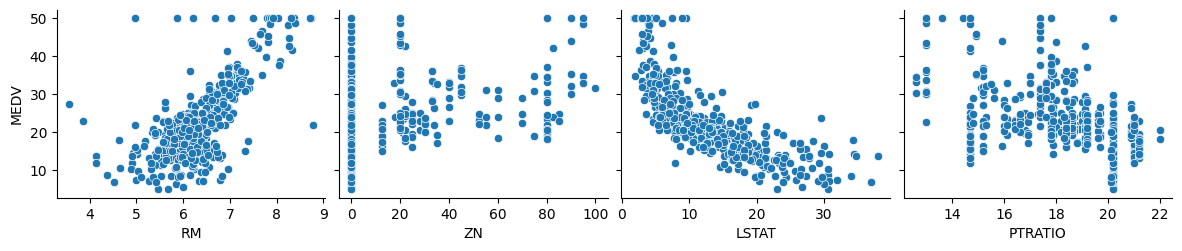

In [12]:
sns.pairplot(housing,x_vars=['RM','ZN','LSTAT','PTRATIO'],y_vars=['MEDV'],aspect=1.2)

### Feature Engineering

In [13]:
housing['TAX_RM']=housing['TAX']/housing['RM']

In [14]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAX_RM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [15]:
corr_pearson=housing.corr(method='pearson')
corr_spearman=housing.corr(method='spearman')

corr_comapre=pd.DataFrame({
    'Pearson':corr_pearson['MEDV'],
    'Spearman':corr_spearman['MEDV']
}).sort_values(by='Pearson',ascending=False)

corr_comapre

,Pearson,Spearman
MEDV,1.000000,1.000000
RM,0.695360,0.633576
ZN,0.360445,0.438179
B,0.333461,0.185664
DIS,0.249929,0.445857
CHAS,0.175260,0.140612
AGE,-0.376955,-0.547562
RAD,-0.381626,-0.346776
CRIM,-0.388305,-0.558891
NOX,-0.427321,-0.562609


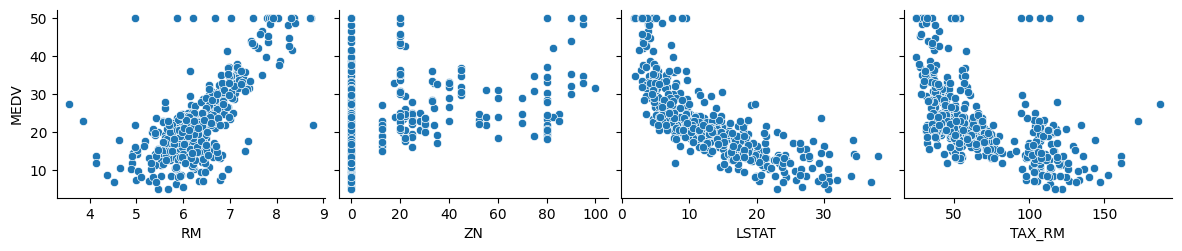

In [16]:
sns.pairplot(housing,x_vars=['RM','ZN','LSTAT','TAX_RM'],y_vars=['MEDV'],aspect=1.2)

### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(housing[['RM','ZN','LSTAT','TAX_RM']],housing['MEDV'],test_size=0.2,random_state=2)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import root_mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor

In [19]:
pipe_lr=Pipeline([
    ('scaler',StandardScaler()),
    ('reg',LinearRegression())
])

In [20]:
pipe_ridge=Pipeline([
    ('scaler',StandardScaler()),
    ('ridge',Ridge(alpha=8.0))
])

In [21]:
pipe_lasso=Pipeline([
    ('scaler',StandardScaler()),
    ('ridge',Lasso(alpha=0.08))
])

In [22]:
pipe_knn=Pipeline([
    ('scaler',StandardScaler()),
    ('knn',KNeighborsRegressor(n_neighbors=5))
])

In [23]:
print('Now Trainning All Models')
pipe_lr.fit(X_train,y_train)

Now Trainning All Models


,steps,"[('scaler', ...), ('reg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [24]:
pipe_ridge.fit(X_train,y_train)

,steps,"[('scaler', ...), ('ridge', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,8.0
,fit_intercept,True
,copy_X,True
,max_iter,None


In [25]:
pipe_lasso.fit(X_train,y_train)

,steps,"[('scaler', ...), ('ridge', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,0.08
,fit_intercept,True
,precompute,False
,copy_X,True


In [26]:
pipe_knn.fit(X_train,y_train)

,steps,"[('scaler', ...), ('knn', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [27]:
print('All Models are Trained....')

All Models are Trained....


In [28]:
y_pred_lr=pipe_lr.predict(X_test)
y_pred_ridge=pipe_ridge.predict(X_test)
y_pred_lasso=pipe_lasso.predict(X_test)
y_pred_knn=pipe_knn.predict(X_test)

In [29]:
from sklearn.metrics import r2_score,root_mean_squared_error

print(f'R2 Score for LR : {r2_score(y_test,y_pred_lr):.4f}')
print(f'R2 Score for Ridge : {r2_score(y_test,y_pred_ridge):.4f}')
print(f'R2 Score for Lasso : {r2_score(y_test,y_pred_lasso):.4f}')
print(f'R2 Score for KNN : {r2_score(y_test,y_pred_knn):.4f}')

R2 Score for LR : 0.7227
R2 Score for Ridge : 0.7240
R2 Score for Lasso : 0.7220
R2 Score for KNN : 0.8403


In [30]:
print(f'RMSE Score for LR : {root_mean_squared_error(y_test,y_pred_lr):.4f}')
print(f'RMSE Score for Ridge : {root_mean_squared_error(y_test,y_pred_ridge):.4f}')
print(f'RMSE Score for Lasso : {root_mean_squared_error(y_test,y_pred_lasso):.4f}')
print(f'RMSE Score for KNN : {root_mean_squared_error(y_test,y_pred_knn):.4f}')

RMSE Score for LR : 4.8168
RMSE Score for Ridge : 4.8050
RMSE Score for Lasso : 4.8228
RMSE Score for KNN : 3.6546


In [31]:
results = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'KNN Regression'],
    'R2 Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_knn)
    ],
    'RMSE': [
        root_mean_squared_error(y_test, y_pred_lr),
        root_mean_squared_error(y_test, y_pred_ridge),
        root_mean_squared_error(y_test, y_pred_lasso),
        root_mean_squared_error(y_test, y_pred_knn)
    ]
}

metrics=pd.DataFrame(results)

In [32]:
metrics

,Model,R2 Score,RMSE
0,Linear Regression,0.722667,4.816807
1,Ridge Regression,0.724030,4.804954
2,Lasso Regression,0.721976,4.822796
3,KNN Regression,0.840349,3.654632


My Linear, Ridge, and Lasso regression models all explain about 72% of the variation in house prices, indicating that regularization doesn’t make a significant difference — so my model is not overfitting.

The KNN model performs better, explaining around 84% of the variance and having the lowest RMSE, meaning its predictions are more accurate and closer to the actual values.